In [1]:
import sys
import os 
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
import matplotlib.pyplot as plt
from models.PCA.PCA import PCA
from models.Kmeans.Kmeans import Kmeans
import numpy as np

data_path = os.path.abspath(os.path.join("2","..", "..","..", "data", "external","word-embeddings.feather"))

df = pd.read_feather(data_path)  
string_array = np.array(df['vit'].tolist())  

words = df['words'].tolist() 

print(string_array.shape)

(200, 512)


In [2]:
k2 = 3
kmeans = Kmeans(k=k2)

kmeans.fit(string_array)

cluster_labels = kmeans.labels

clustered_words = {i: [] for i in range(k2)}  
for word, label in zip(words, cluster_labels):
    clustered_words[label].append(word)

for cluster, words_in_cluster in clustered_words.items():
    print(f"Cluster {cluster}:")
    print(", ".join(words_in_cluster)) 


Cluster 0:
sing, listen, dive, flame, knock, exit, smile, bury, download, eat, postcard, hard, bend, fight, call, face, kiss, selfie, catch, hit, paint, far, cry, clap, pull, sleep, hollow, clean, sad, empty, slide, drink, draw, pray, arrest, email, buy, burn, fire, close, angry, lazy, scary, hang, book, earth, tank, enter, key, swim, zip, happy, loud, love, cook, recycle, cut, sunny
Cluster 1:
deer, panda, ape, rose, helicopter, sit, cat, table, bear, spider, shark, grass, giraffe, forest, lizard, mug, frog, fly, gym, lake, climb, kneel, monkey, roof, stairs, rifle, cow, pencil, bed, starfish, plant, dig, run, van, sweater, jacket, bench, sun, puppy, feet, boat, pear, peacock, fish, saturn, fruit, grape, laptop, door, calendar, chair, mouse, ladder, ant, goldfish, bird, spiderman, bee, tree, beetle, snake, rain, ambulance, television, throne, tent, camera, tomato, dragonfly, parachute, butterfly, car, lantern, elephant, pant, rainy, wheel, bicycle, windmill, potato, crocodile, shoe, w

/home/rohit/miniconda3/envs/smai/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/rohit/miniconda3/envs/smai/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


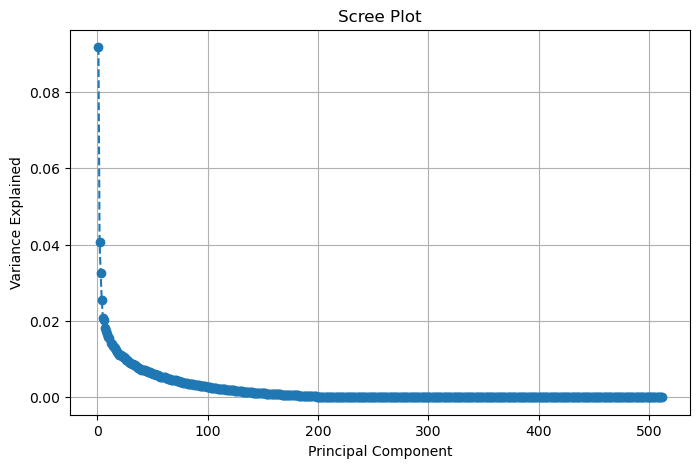

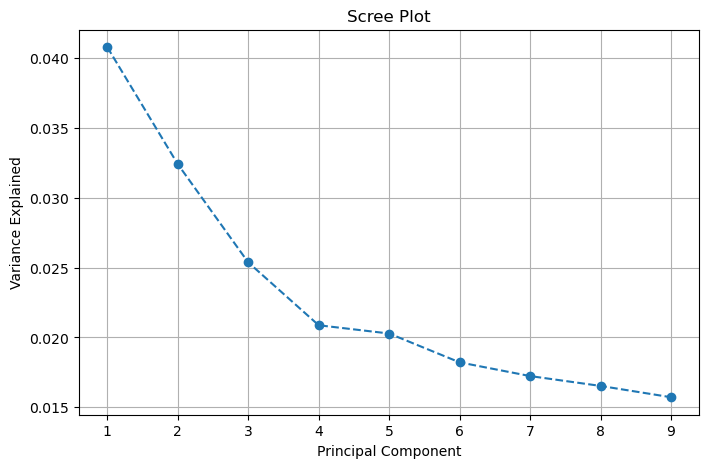

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from models.PCA.PCA import PCA  
from models.GMM.GMM import GMM

pca = PCA(n_components=string_array.shape[1]) 
pca.fit(string_array)

explained_variance_ratio = pca.ret_importance()

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.savefig("plots/6_big_scree_plot.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 10), explained_variance_ratio[1:10], marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.savefig("plots/6_small_scree_plot.png")
plt.show()

### from the scree plot we can say that the elbow is at 4 dimensions


#### Kmeans3 obtained is n_clusters = 7 (in the range of 5 - 9)

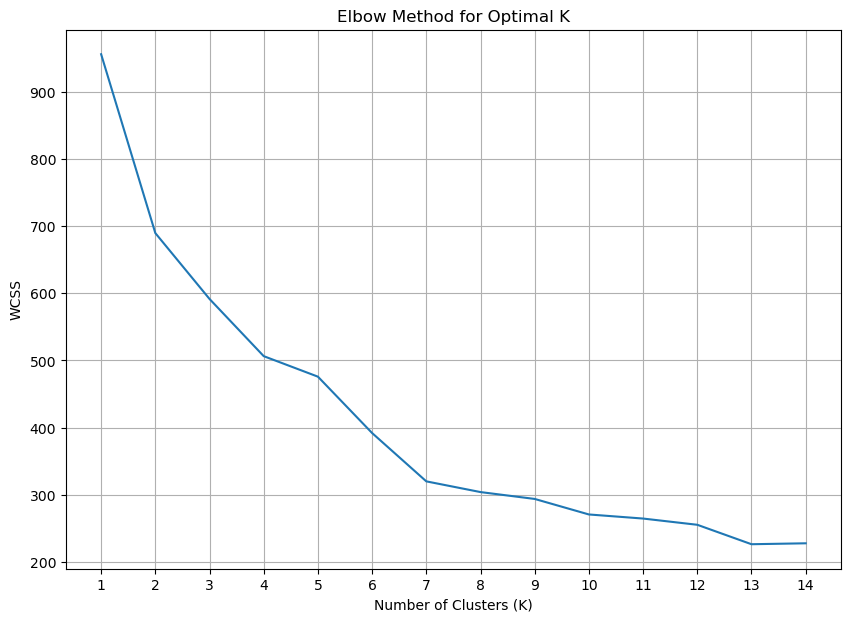

In [4]:
from models.Kmeans.Kmeans import Kmeans

pca = PCA(n_components=5)
pca.fit(string_array) 

reduced_data = pca.transform(string_array)

wcss = []
k_range = range(1, 15)
for k in k_range:
    kmeans = Kmeans(k=k)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.cost)

plt.figure(figsize=(10, 7))
plt.plot(k_range, wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('plots/6_main_kmeans_data_elbow.png')
plt.show()


### Using Kmeans3 = 7 (changes between 6 and 11)

In [5]:

optimal_k = 7
kmeans = Kmeans(k=optimal_k, random_state=42)
kmeans.fit(reduced_data)

final_cluster_assignments = kmeans.labels

kmeans3 = optimal_k

kmeans = Kmeans(k=kmeans3)
kmeans.fit(reduced_data)

cluster_labels = kmeans.labels

clustered_words = {i: [] for i in range(optimal_k)} 
for word, label in zip(words, cluster_labels):
    clustered_words[label].append(word)

for cluster, words_in_cluster in clustered_words.items():
    print(f"Cluster {cluster}:")
    print(", ".join(words_in_cluster[:20])) 

Cluster 0:
rose, dive, exit, brick, smile, bear, bullet, grass, forest, postcard, bend, puppet, fly, face, climb, kneel, scream, kiss, selfie, paint
Cluster 1:
deer, panda, helicopter, spider, shark, giraffe, lizard, frog, monkey, starfish, pear, peacock, saturn, grape, ant, goldfish, spiderman, tree, beetle, dragonfly
Cluster 2:
table, roof, stairs, microwave, sweater, jacket, bench, bucket, laptop, door, chair, ladder, igloo, clock, oven, pillow, envelope, dustbin, ambulance, throne
Cluster 3:
drive, sing, fishing, lake, passport, catch, notebook, baseball, boat, basket, drink, badminton, skate, tattoo, rain, swim, rainy, basketball, bicycle, walk
Cluster 4:
ape, sit, cat, mug, eat, gym, rifle, cow, pencil, bed, dig, run, van, sun, feet, fruit, calendar, calculator, bee, television
Cluster 5:
needle, eraser, carrot, brush, feather, spoon, knit, cigarette, microphone, flute, scissor, finger, candle, toothbrush, screwdriver, fingerprints, teaspoon, length, sword, knife
Cluster 6:
liste

In [6]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

AIC = []
BIC = []

k = 3

n_samples, n_features = string_array.shape


gmm = GaussianMixture(n_components=k, covariance_type='full', n_init=10, tol=1e-3)
gmm.fit(string_array)

cluster_labels = gmm.predict(string_array)

clustered_words = {i: [] for i in range(k)}  
for word, label in zip(words, cluster_labels):
    clustered_words[label].append(word)

for cluster, words_in_cluster in clustered_words.items():
    print(f"Cluster {cluster}:")
    print(", ".join(words_in_cluster)) 



Cluster 0:
sing, listen, flame, sit, knock, exit, smile, bury, download, eat, postcard, hard, bend, fight, call, face, kneel, selfie, catch, hit, paint, far, dig, cry, run, clap, pull, sleep, clean, sad, empty, slide, drink, draw, pray, arrest, email, buy, burn, fire, close, angry, lazy, scary, hang, book, earth, enter, key, zip, happy, loud, love, cook, recycle, cut
Cluster 1:
drive, rose, dive, needle, brick, fishing, bear, spider, bullet, shark, grass, forest, lizard, brush, feather, spoon, frog, puppet, fly, lake, climb, scream, monkey, kiss, passport, plant, notebook, knit, cigarette, baseball, hollow, bucket, puppy, boat, basket, fish, saturn, badminton, mouse, bird, clock, spiderman, skate, hammer, snake, tattoo, fingerprints, teaspoon, dustbin, rain, tank, airplane, pizza, swim, butterfly, sword, loudspeaker, telephone, rainy, knife, basketball, wheel, bicycle, arrow, shoe, walk, sunny, radio, truck, paintbrush
Cluster 2:
deer, panda, ape, helicopter, cat, eraser, table, carrot

#### 6.4

Converged after 2 iterations
Converged after 26 iterations
Converged after 61 iterations
Converged after 73 iterations
Converged after 216 iterations
Converged after 81 iterations
Converged after 76 iterations
Converged after 64 iterations
Converged after 32 iterations


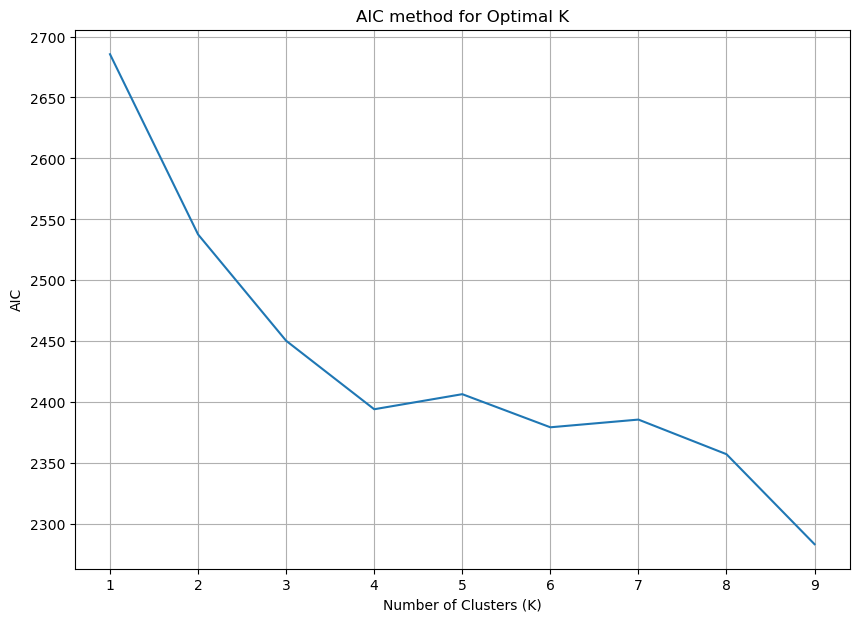

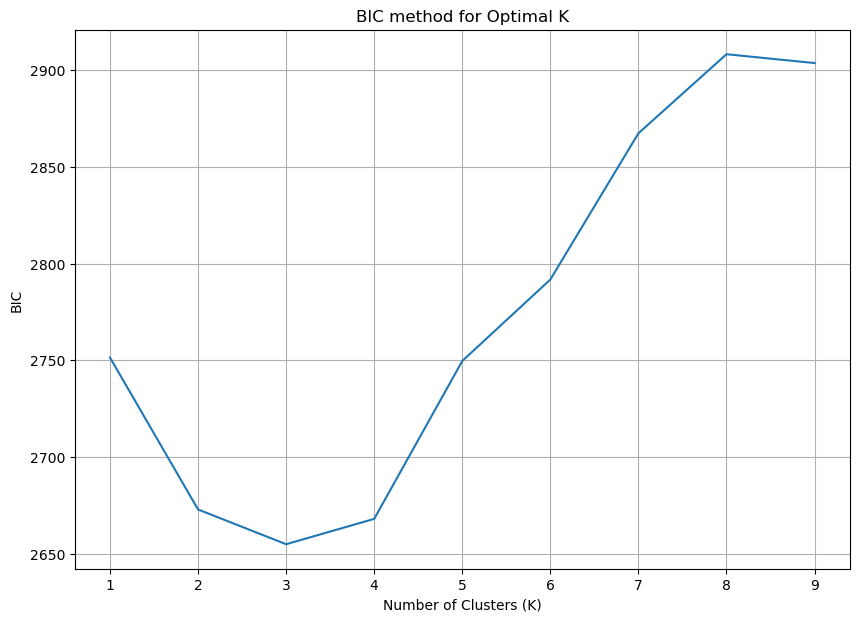

In [7]:
AIC = []
BIC = []
k_range = range(1, 10)

n_samples, n_features = reduced_data.shape

for i in k_range:
    gmm = GMM(k=i)
    gmm.fit(np.real(reduced_data))
    LL = gmm.getLikelihood(np.real(reduced_data))
    
    n_params = (i * n_features) + (i * n_features * (n_features + 1) // 2) + (i - 1)
    
    AIC.append(2 * n_params - 2 * LL)
    BIC.append(n_params * np.log(n_samples) - 2 * LL)


plt.figure(figsize=(10, 7))
plt.plot(k_range, AIC)
plt.title('AIC method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('AIC')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('plots/6_gmm-aic.png')
plt.show()    

plt.figure(figsize=(10, 7))
plt.plot(k_range, BIC)
plt.title('BIC method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('plots/6_gmm-bic.png')
plt.show()   


#### we can see that the elbow point is at Kgmm3 = 3 from the AIC and BIC plots

In [8]:
optimal_k = 3
gmm = GMM(k = optimal_k)

gmm.fit(reduced_data)

cluster_labels = gmm.predict(reduced_data)

clustered_words = {i: [] for i in range(optimal_k)} 
for word, label in zip(words, cluster_labels):
    clustered_words[label].append(word)

for cluster, words_in_cluster in clustered_words.items():
    print(f"Cluster {cluster}:")
    print(", ".join(words_in_cluster)) 

Converged after 28 iterations
Cluster 0:
needle, eraser, carrot, bullet, brush, feather, eat, spoon, bend, puppet, scream, rifle, pencil, dig, run, knit, cigarette, microphone, pear, sad, flute, scissor, mouse, finger, candle, hammer, toothbrush, screwdriver, snake, fingerprints, teaspoon, length, zip, tomato, sword, pant, knife, toothpaste, arrow, potato, comb, fork, paintbrush
Cluster 1:
drive, sing, listen, dive, flame, helicopter, sit, knock, table, exit, brick, fishing, smile, grass, bury, download, forest, mug, postcard, hard, fight, call, gym, lake, face, climb, kneel, kiss, passport, selfie, roof, stairs, catch, hit, bed, paint, plant, far, microwave, cry, notebook, clap, pull, sleep, van, sweater, baseball, hollow, jacket, bench, bucket, clean, feet, boat, basket, empty, slide, drink, laptop, door, draw, calendar, badminton, chair, ladder, pray, arrest, email, buy, igloo, clock, oven, calculator, burn, pillow, fire, close, angry, lazy, scary, tree, hang, envelope, skate, book,

/home/rohit/miniconda3/envs/smai/lib/python3.12/site-packages/scipy/stats/_multivariate.py:449: ComplexWarning: Casting complex values to real discards the imaginary part
  mean = np.asarray(mean, dtype=float)
/home/rohit/miniconda3/envs/smai/lib/python3.12/site-packages/scipy/stats/_multivariate.py:464: ComplexWarning: Casting complex values to real discards the imaginary part
  cov = np.asarray(cov, dtype=float)
/home/rohit/miniconda3/envs/smai/lib/python3.12/site-packages/scipy/stats/_multivariate.py:498: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=float)
